In [1]:
from serial import Serial
from time import sleep
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def call_pcu(command) -> list:
    print(f'calling pcu with {command}')
    outputs = []
    command_bytes = (command + '\r\n').encode()
    with Serial('/dev/ttyACM1', baudrate=38400, timeout=0.1) as ser:
        ser.write(command_bytes)
        all_read = False
        while not all_read:
            out = ser.read_until()
            outputs.append(out)
            if out == b'':
                all_read = True
    return outputs

In [3]:
def post_process_outputs(outputs, plot_title="") -> list:
    lines = [line.decode() for line in outputs]
    lines = [line for line in lines if "i=" in line]
    lines = [line.split("i=")[1].replace('␊','') for line in lines]
    lines = [int(line) for line in lines]
    if plot_title:
        fig, ax = plt.subplots(1)
        ax.plot(lines)
        ax.set_title(plot_title)
        ax.set_ylabel('imotor_prot')
    return lines

In [27]:
def get_dockingstate():
    outp = call_pcu('get_dockingstate')
    for line in outp:
        if 'pcu_docking' in line.decode():
            return line.decode().strip().split('ch> ')[1]

In [28]:
get_dockingstate()

calling pcu with get_dockingstate


'pcu_dockingState1_undocked'

In [32]:
test_runs = []
df = pd.DataFrame({'iteration': [], 'current': [], 'command': []})
    
for i in range(10):
    output_raw = call_pcu('dock')
    dock_currents = post_process_outputs(output_raw)
    dock_df = pd.DataFrame({'iteration': [i]*len(dock_currents), 'current': dock_currents, 'command': ['dock']*len(dock_currents)})
    dockingstate_after_docking = get_dockingstate()
    sleep(0.5)

    output_raw = call_pcu('undock')
    undock_currents = post_process_outputs(output_raw)
    undock_df = pd.DataFrame({'iteration': [i]*len(undock_currents), 'current': undock_currents, 'command': ['undock']*len(undock_currents)})
    dockingstate_after_undocking = get_dockingstate()
    sleep(0.5)
    
    df = pd.concat([df, dock_df, undock_df])
    test_runs.append({
        "iteration": i,
        "dock_currents": dock_currents,
        "dockingstate_after_docking": dockingstate_after_docking,
        "undock_currents": undock_currents,
        "dockingstate_after_undocking": dockingstate_after_undocking,
    })

calling pcu with dock
calling pcu with get_dockingstate
calling pcu with undock
calling pcu with get_dockingstate
calling pcu with dock
calling pcu with get_dockingstate
calling pcu with undock
calling pcu with get_dockingstate
calling pcu with dock
calling pcu with get_dockingstate
calling pcu with undock
calling pcu with get_dockingstate
calling pcu with dock
calling pcu with get_dockingstate
calling pcu with undock
calling pcu with get_dockingstate
calling pcu with dock
calling pcu with get_dockingstate
calling pcu with undock
calling pcu with get_dockingstate
calling pcu with dock
calling pcu with get_dockingstate
calling pcu with undock
calling pcu with get_dockingstate
calling pcu with dock
calling pcu with get_dockingstate
calling pcu with undock
calling pcu with get_dockingstate
calling pcu with dock
calling pcu with get_dockingstate
calling pcu with undock
calling pcu with get_dockingstate
calling pcu with dock
calling pcu with get_dockingstate
calling pcu with undock
calling 

In [30]:
def plot_iteration(iteration: int):
    fig, (ax0, ax1) = plt.subplots(2)
    ax0.plot(test_runs[iteration]["dock_currents"])
    ax0.set_title(f"docking current. Result: {test_runs[iteration]['dockingstate_after_docking']}")
    ax1.plot(test_runs[iteration]["undock_currents"])
    ax1.set_title(f"undocking current. Result: {test_runs[iteration]['dockingstate_after_undocking']}")
    plt.suptitle(f"data for iteration {iteration}")
    plt.tight_layout()

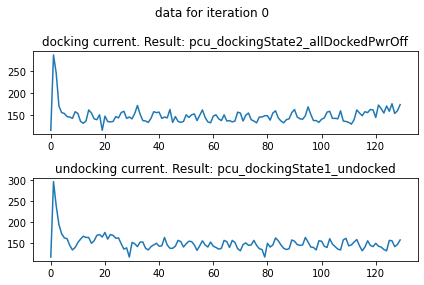

In [31]:
plot_iteration(0)